<a href="https://colab.research.google.com/github/ikonushok/My_projects/blob/main/%D0%A0%D0%B0%D0%B7%D0%B1%D0%BE%D1%80_HW4_Light_%D0%A3%D0%B3%D0%BB%D1%83%D0%B1%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B2_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задания уровня light:
1. Выполнить задание ultra-light
2. Реализовать режимы(return_states, return_sequences итд) работы одной из 3х RNN
3. Написать выводы

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, GRU, Embedding, Bidirectional, Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Ссылка на перевод руководства к Keras: https://ru-keras.com/recurrent-layers/

**LSTM**

keras.layers.LSTM(units, activation=’tanh’, recurrent_activation=’sigmoid’, use_bias=True, kernel_initializer=’glorot_uniform’, recurrent_initializer=’orthogonal’, bias_initializer=’zeros’, unit_forget_bias=True, kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, implementation=2, **return_sequences=**False, **return_state=**False, **go_backwards=**False, **stateful=**False, unroll=False)


Аргументы:

- **return_sequences**: Логический. Возвращать ли последний вывод в выходной последовательности, или всю последовательность.
- **return_state**: Логический. Возвращать ли последнее состояние в дополнение к выходной последовательности. Возвращаемые элементы списка состояний скрытые и состояние ячейки соответственно.
- **go_backwards**: Логический (по умолчанию False). Если True, обработает входную последовательность в обратном направлении и вернет обратную последовательность.
- **stateful**: Логический (по умолчанию False). Если True, то в качестве начального состояния для выборки с индексом i в следующем пакете будет использоваться последнее состояние для каждой выборки с индексом i.

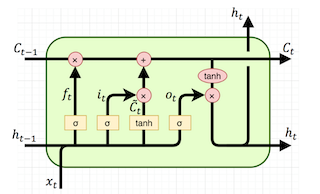


#Режимы работы RNN

In [ ]:
num_words = 100 # размер словаря

In [ ]:
x = np.random.randint(0, 100, [3, 10]) #3 предложения по 10 токенов каждый
x.shape

(3, 10)

In [ ]:
x

array([[32, 10, 84, 25,  4, 33, 86, 72,  0, 56],
       [72, 19,  9,  6, 21, 94, 34, 72, 21, 86],
       [83, 92, 16, 85, 81,  7, 24, 67,  4, 48]])

In [ ]:
emb = Embedding(100, 5) #для словаря из 100 слов. длина вектора - 5

Слой Embedding представляет собой матрицу размером NxP, 

где N– размер словаря, 

P – гиперпараметр, который подбирается эмпирически

Статья про Embedding в журнале Наука и Жизнь: https://www.nkj.ru/open/36052/

In [ ]:
x_ = emb(x) # подаем в Embedding слой наш вектор [3,10]
x_.shape #3 предложения по 10 слов, на каждое слово эмбеддинг длиной 5

TensorShape([3, 10, 5])

### стандартный (выход после обработки всей последовательности)

In [ ]:
lstm = LSTM(10)
# обратите внимание, что 10 - это не число нейронов, а выходной размер состояния h и c
y = lstm(x_)
y.shape #3 предложения, финальное состояние длиной 10

TensorShape([3, 10])

### return_sequences = True
когда нужно получить последние состояния h и с

нам будет возвращен список из 3х тензоров: для y, h, c

In [ ]:
lstm = LSTM(10, return_sequences=True)
y = lstm(x_)
y.shape #3 предложения по 10 слов, входу каждого слова соответствует выход слоя размером 10

TensorShape([3, 10, 10])

### return_state = True

In [ ]:
lstm = LSTM(10, return_state=True)
y, h, c = lstm(x_)
y.shape, h.shape, c.shape #список из трех состояний y, h, c, (y==h), для 3 предложений с финальным состоянием длиной 10

(TensorShape([3, 10]), TensorShape([3, 10]), TensorShape([3, 10]))

In [ ]:
# проверим, что y = h
(y == h).numpy().all()

True

In [ ]:
gru = GRU(10, return_state=True)
y, h = gru(x_)
y.shape, h.shape #список из двух состояний y, h, (y==h). для 3 предложений с финальным состоянием длиной 10

(TensorShape([3, 10]), TensorShape([3, 10]))

In [ ]:
# проверим, что y = h
(y == h).numpy().all()

True

In [ ]:
y, h

(<tf.Tensor: shape=(3, 10), dtype=float32, numpy=
 array([[ 0.00239232,  0.00417147, -0.00768877, -0.00452797, -0.00400825,
         -0.00594491, -0.00760407,  0.01259897, -0.00625374,  0.00733173],
        [ 0.00390783,  0.00268459,  0.00946846,  0.00994927, -0.0071147 ,
          0.00611842, -0.0051639 ,  0.00880378,  0.01108902,  0.0046387 ],
        [ 0.02019997,  0.00010057, -0.0067403 , -0.00188754, -0.01493516,
         -0.01378522, -0.02532139,  0.00558682,  0.00664046, -0.00460202]],
       dtype=float32)>, <tf.Tensor: shape=(3, 10), dtype=float32, numpy=
 array([[ 0.00239232,  0.00417147, -0.00768877, -0.00452797, -0.00400825,
         -0.00594491, -0.00760407,  0.01259897, -0.00625374,  0.00733173],
        [ 0.00390783,  0.00268459,  0.00946846,  0.00994927, -0.0071147 ,
          0.00611842, -0.0051639 ,  0.00880378,  0.01108902,  0.0046387 ],
        [ 0.02019997,  0.00010057, -0.0067403 , -0.00188754, -0.01493516,
         -0.01378522, -0.02532139,  0.00558682,  0.006640

### go_backwards = True
пойдет обработка из конца в начало

In [ ]:
lstm = LSTM(10, go_backwards=True) #перед обработкой переворачивать последовательность
y = lstm(x_)
y.shape #3 предложения, финальное состояние каждого длиной 10

TensorShape([3, 10])

### Stateful RNN
возвращать или нет опять на вход нейросети состояние h 

stateful = False

In [ ]:
# проверим, что каждый раз, подавая в сеть одно и то-же мы получаем ОДИНАКОВЫЙ результат, тк состояния h обнуляются
lstm = LSTM(10, stateful=False)
a = lstm(x_) #после выполнения состояния обнулились
b = lstm(x_) #после выполнения состояния обнулились
(a==b).numpy().all()

True

In [ ]:
a, b

(<tf.Tensor: shape=(3, 10), dtype=float32, numpy=
 array([[-0.00514298,  0.0097881 , -0.00027349, -0.00072675, -0.00550164,
         -0.00378106, -0.00437825,  0.00074916, -0.00244936,  0.00053809],
        [ 0.00924189,  0.00148618,  0.01083808, -0.00410664,  0.0012846 ,
         -0.00378377, -0.00148451,  0.00163346, -0.00250856, -0.00156964],
        [-0.00497552,  0.00605357, -0.0032243 , -0.00131298, -0.00167984,
         -0.00291984,  0.00245977,  0.00086771, -0.00275005, -0.00480349]],
       dtype=float32)>, <tf.Tensor: shape=(3, 10), dtype=float32, numpy=
 array([[-0.00514298,  0.0097881 , -0.00027349, -0.00072675, -0.00550164,
         -0.00378106, -0.00437825,  0.00074916, -0.00244936,  0.00053809],
        [ 0.00924189,  0.00148618,  0.01083808, -0.00410664,  0.0012846 ,
         -0.00378377, -0.00148451,  0.00163346, -0.00250856, -0.00156964],
        [-0.00497552,  0.00605357, -0.0032243 , -0.00131298, -0.00167984,
         -0.00291984,  0.00245977,  0.00086771, -0.002750

stateful = True

In [ ]:
# проверим, что каждый раз, подавая в сеть одно и то-же мы получаем РАЗНЫЙ результат, тк состояния h обнуляются
# как мы это делали в задании UltraLight
lstm = LSTM(10, stateful=True) #изначально состояния нулевые (если не указан другой initializer)
a = lstm(x_) #после выполнения изначельное состояния сохранились
b = lstm(x_) #этот слой возьмет состояния, изменившиеся после предыдущего прохода
(a==b).numpy().all()

False

In [ ]:
a, b

(<tf.Tensor: shape=(3, 10), dtype=float32, numpy=
 array([[-2.3691885e-03,  3.1898301e-03,  4.1902224e-03,  2.0015666e-03,
         -1.0172448e-03,  2.6063170e-05, -5.7451199e-03, -4.9241725e-03,
         -2.1159404e-03, -1.3761383e-03],
        [ 1.3422732e-03, -4.9607842e-03, -4.7743588e-04,  6.6727046e-03,
         -5.2421587e-04,  3.8487483e-03,  8.8327499e-03, -5.4340186e-03,
          3.1169613e-03,  3.9534399e-04],
        [ 4.4802967e-03, -4.1742131e-04,  5.2521406e-03,  1.1413668e-04,
          3.6410003e-03, -1.3920910e-03, -1.0597138e-02,  2.5113060e-03,
         -8.6512910e-03, -7.9385168e-04]], dtype=float32)>,
 <tf.Tensor: shape=(3, 10), dtype=float32, numpy=
 array([[-3.1153494e-03,  3.5121685e-03,  4.6355296e-03,  2.1164264e-03,
         -7.1000733e-04, -3.4098743e-04, -6.9018872e-03, -4.7875112e-03,
         -2.6765647e-03, -9.7233109e-04],
        [ 1.3525739e-03, -5.6958073e-03, -1.1059035e-03,  7.2363438e-03,
         -1.1549902e-03,  4.4738674e-03,  1.0511695e-02, 

### bidirectional = True. (lstm1 & lstm2(go_backwards))

это параллелльная обраборка lstm с прямым порядком (go_backwards = False) и обратным (go_backwards = True) и их последующая конкатенация

In [ ]:
lstm =  Bidirectional(LSTM(10))
y = lstm(x_)
y.shape #3 предложения, финальное состояние каждого длиной 20 (10 от прямой последовательности, 10 от перевернутой)

TensorShape([3, 20])

In [ ]:
lstm =  Bidirectional(LSTM(10, return_sequences=True))
y = lstm(x_)
y.shape #3 предложения по 10 слов состояние каждого длиной 20 (10 от прямой последовательности, 10 от перевернутой)

TensorShape([3, 10, 20])